# Pymaceuticals Inc.
---
In this analysis, I examined potential treaments for squamous cell carsinoma (SCC), a common form of skin cancer, using mice as the subject of study. There were several different drug regimens that were included in the data set. However, in this analysis, I focused on four of them with the deepest analysis being conducted on the drug "Capomulin".

### Observations
---
- Mice who have a higher average weight consequently have bigger average tumor volumes. We can see this in the positive correlation between weight and tumor size in the last chart. The pearson's correlation coeficient is at .84 which means there is a strong correlation.
- The gender of the mice is extremely well distributed. However, I would have liked to make sure that the distrubution remains the same across each individual drug.
- Capomulin and Ramicane both have the smallest final tumor volume for the entire population out of the four that I chose to focus on when removing outliers. I think that there need to be more analysis of the starting tumor volume compared to the final tumor volume to really figure out if that is true.

### Conclusions
---
Due to the limited scope of the analysis and the time constraint, I don't think that this analysis can really determine the most effective drug regimens. The analysis does point future analysies in the right direction by demonstrating the drugs, Capomulin and Ramicane, have smaller tumors than the other two, Infubinol and Ceftamin, but my analysis did not dive into whether or not there were other, more effective drugs besides those four. Ultimatly, I think there needs to be more analysis on this animal study to determine actual, data driven suggestions.
 

In [49]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
merged_study_data = pd.merge(mouse_metadata, study_results, on='Mouse ID')

# Display the data table for preview
merged_study_data.head()


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [50]:
# Checking the number of mice.
mice_study_count = len(study_results['Mouse ID'].unique())
mice_study_count


249

In [51]:
# Double check the number of mice from both datasets
mice_metadata_count = mouse_metadata['Mouse ID'].count()
mice_metadata_count


249

In [52]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint.
duplicates = merged_study_data[merged_study_data.duplicated(subset=['Mouse ID', 'Timepoint'], keep=False)]
duplicates['Mouse ID'].unique()

array(['g989'], dtype=object)

In [53]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
cleaned_study_data = merged_study_data[merged_study_data['Mouse ID'] != 'g989']
cleaned_study_data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [54]:
# Checking the number of mice in the clean DataFrame.
clean_mice_count = len(cleaned_study_data['Mouse ID'].unique())
clean_mice_count


248

## Summary Statistics

In [55]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen:
# mean, median, variance, standard deviation, and SEM of the tumor volume.
# Assemble the resulting series into a single summary DataFrame.
avg_tumor_v = cleaned_study_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].mean()
median_tumor_v = cleaned_study_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].median()
tumor_volume_var = cleaned_study_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].var()
tumor_volume_std = cleaned_study_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].std()
tumor_volume_std_error = cleaned_study_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].sem()

# Create a dataframe out of these calculations
drug_regimen_df = pd.DataFrame({
    'Mean Tumor Volume': avg_tumor_v,
    'Median Tumor Volume': median_tumor_v,
    'Tumor Volume Variance': tumor_volume_var,
    'Tumor Volume Std. Dev': tumor_volume_std,
    'Tumor Volume Std. Err.': tumor_volume_std_error
})
drug_regimen_df


,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [56]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
drug_regimen_df_simple = cleaned_study_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg(
    mean='mean',
    median='median',
    var='var',
    std='std',
    sem='sem'
)
drug_regimen_df_simple


,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

<Axes: xlabel='Drug Regimen', ylabel='# of Observed Mouse Timepoints'>

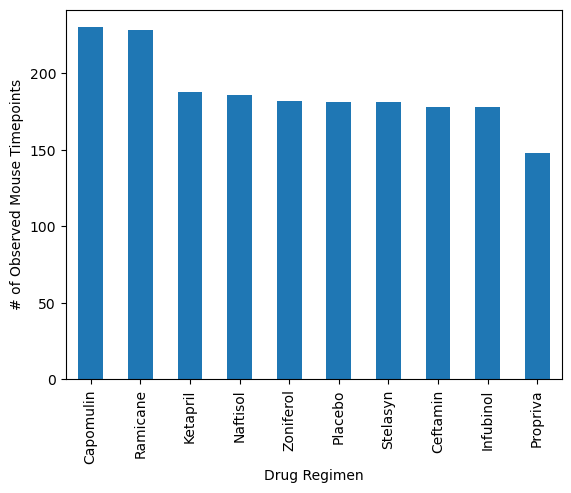

In [57]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
timepoints_count = cleaned_study_data.groupby('Drug Regimen')['Timepoint'].count()

# Sort the Series for clarity
sorted_timepoints = timepoints_count.sort_values(ascending=False)

# Generate Bar chart
sorted_timepoints.plot(
    kind='bar',
    xlabel='Drug Regimen',
    ylabel='# of Observed Mouse Timepoints'
)


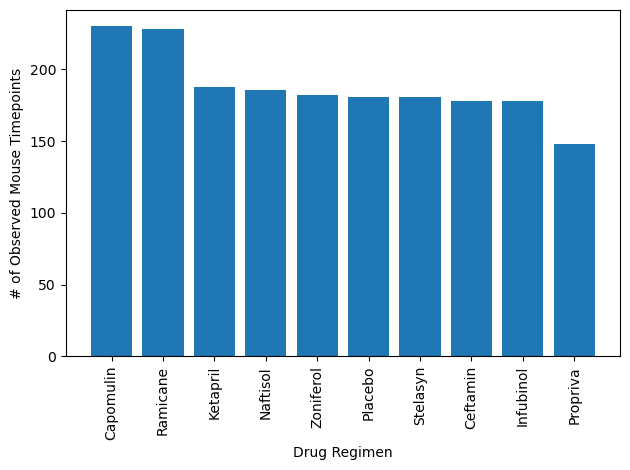

In [58]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
timepoints_size = cleaned_study_data.groupby('Drug Regimen').size()

# Sort the for clarity
sorted_timepoints_size = timepoints_size.sort_values(ascending=False)

# Generate bar chart
plt.bar(sorted_timepoints_size.index, sorted_timepoints_size.values)

# Label and format the chart
plt.xlabel('Drug Regimen')
plt.ylabel('# of Observed Mouse Timepoints')
plt.xticks(rotation='vertical')

# Display chart
plt.tight_layout()
plt.show()


In [59]:
# Generate a pie chart, using Pandas, showing the distribution of unique female versus male mice used in the study

# Get the unique mice with their gender
# I think that it would be easier to use the mouse_metadata DataFrame to find out the count of male vs female mice.
# I have to get rid of mouse g989 to keep it consistent with analysis
cleaned_metadata = mouse_metadata[mouse_metadata['Mouse ID'] != 'g989']

# Check number of mice to stay consistent
len(cleaned_metadata['Mouse ID'])


248

In [60]:
# Get the count of both male and female mice
gender_counts = cleaned_metadata['Sex'].value_counts()

# check the count
gender_counts


Sex
Male      125
Female    123
Name: count, dtype: int64

<Axes: title={'center': 'Mouse Gender Distribution'}>

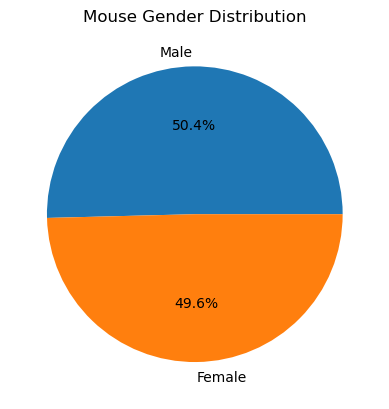

In [61]:
# Make the pie chart
gender_counts.plot(
    kind='pie',
    autopct='%1.1f%%',
    ylabel='',
    title='Mouse Gender Distribution'
)


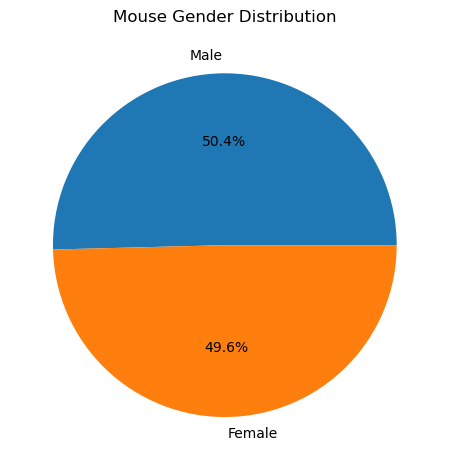

In [62]:
# Generate a pie chart, using pyplot, showing the distribution of unique female versus male mice used in the study

# Get the unique mice with their gender
male_mice_count = len(cleaned_metadata[cleaned_metadata['Sex'] == 'Male'])
female_mice_count = len(cleaned_metadata[cleaned_metadata['Sex'] == 'Female'])

# Create lists to generate pie chart
counts = [male_mice_count, female_mice_count]
labels = ['Male', 'Female']

# Any additional formating
plt.title('Mouse Gender Distribution')

# Generate the pie chart
plt.pie(counts, labels=labels, autopct='%1.1f%%')

# Tighten the layout and display the pie chart
plt.tight_layout()
plt.show()


## Quartiles, Outliers and Boxplots

In [63]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
volume_analysis = cleaned_study_data.groupby('Mouse ID')['Timepoint'].max().reset_index()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
# I assumed you wanted a new dataframe with only the last timepoint for each mouse which is why I put the filtered data first and then merged the two 
# dataframes on the left
final_volume = pd.merge(volume_analysis, cleaned_study_data, on=['Mouse ID', 'Timepoint'], how='left')
final_volume.head()


,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a262,45,Placebo,Female,17,29,70.717621,4
3,a275,45,Ceftamin,Female,20,28,62.999356,3
4,a366,30,Stelasyn,Female,16,29,63.440686,1


In [64]:
# Put treatments into a list for a for loop (and later for plot labels)
drug_regimens = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
# After consulting both ChatGPT and Xpert Learning Assistant, I am going to make this a dictionary instead to track the values and the drugs
# just like I did in the PyPoll challenge
tumor_volumes_dict = {}

# Calculate the IQR and quantitatively determine if there are any potential outliers.
for drug in drug_regimens:

    # Locate the rows which contain mice on each drug and get the tumor volumes
    # This finds all the tumor volumes for the current drug in the drug_regimens list
    tumor_volumes = final_volume.loc[final_volume['Drug Regimen'] == drug, 'Tumor Volume (mm3)']
    
    # Store all the values to the dicitonary
    # .tolist() converts all the values into a list for easier viewing
    tumor_volumes_dict[drug] = tumor_volumes.tolist()

    # Calculate the IQR
    q1 = tumor_volumes.quantile(0.25)
    q3 = tumor_volumes.quantile(0.75)
    iqr = q1 - q3

    #Calculate the upper and lower bounds
    lowerbound = q1 - 1.5 * iqr
    upperbound = q3 + 1.5 * iqr
    
    # Determine outliers using upper and lower bounds
    outliers = tumor_volumes[
    (tumor_volumes > lowerbound) |
    (tumor_volumes < upperbound)
    ]

    # Match the pre-generated output
    print(f"{drug}'s potential outliers: {outliers.tolist()}")
    

Capomulin's potential outliers: [47.68596303, 28.43096411, 46.53920617, 23.34359787, 28.48403281]
Ramicane's potential outliers: [22.05012627, 45.22086888]
Infubinol's potential outliers: [72.2267309, 36.3213458, 47.01036401, 45.69933088, 46.25011212]
Ceftamin's potential outliers: []


In [65]:
# Turn the dictionary into a dataframe for pandas ploting
tumor_volumes_df = pd.DataFrame(tumor_volumes_dict)
tumor_volumes_df.head()


,Capomulin,Ramicane,Infubinol,Ceftamin
0,38.982878,38.407618,67.973419,62.999356
1,38.939633,43.047543,65.525743,45.000000
2,30.485985,38.810366,57.031862,56.057749
3,37.074024,32.978522,66.083066,55.742829
4,40.159220,38.342008,72.226731,48.722078


<Axes: ylabel='Final Tumor Volume (mm3)'>

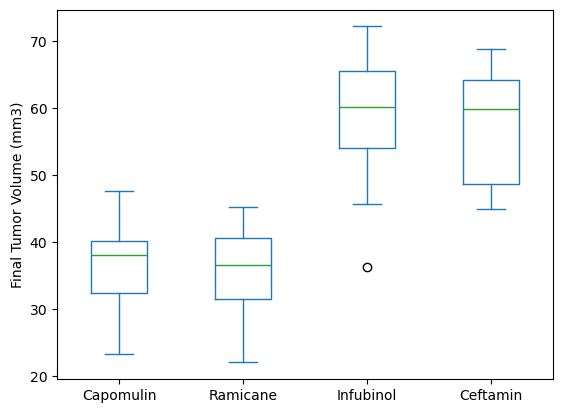

In [66]:
# Generate a box plot that shows the distribution of the tumor volume for each treatment group.
tumor_volumes_df.plot(
    kind='box',
    ylabel='Final Tumor Volume (mm3)'
)


## Line and Scatter Plots

In [67]:
capomulin_mice = cleaned_study_data[cleaned_study_data['Drug Regimen'] == 'Capomulin']
mice_id = capomulin_mice['Mouse ID'].unique()
print(mice_id)


['s185' 'x401' 'm601' 'f966' 'u364' 'y793' 'r554' 'm957' 't565' 'i738'
 'w914' 'g288' 'l897' 'b742' 'b128' 'j246' 'j119' 'w150' 'v923' 'g316'
 's710' 'l509' 'r944' 'i557' 'r157']


<Axes: title={'center': 'Capomulin treatment of mouse F966'}, xlabel='Timepoint (days)', ylabel='Tumor Volume (mm3)'>

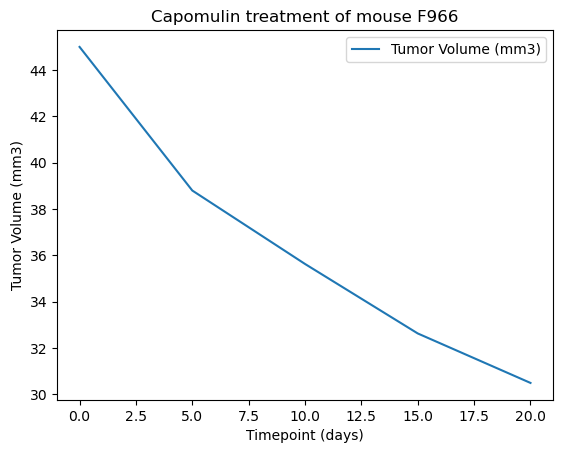

In [68]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
id = 'f966'
special_mouse = capomulin_mice[capomulin_mice['Mouse ID'] == id]
special_mouse.plot(
    kind='line',
    x='Timepoint',
    y='Tumor Volume (mm3)',
    xlabel='Timepoint (days)',
    ylabel='Tumor Volume (mm3)',
    title = f'Capomulin treatment of mouse {id.upper()}'
)


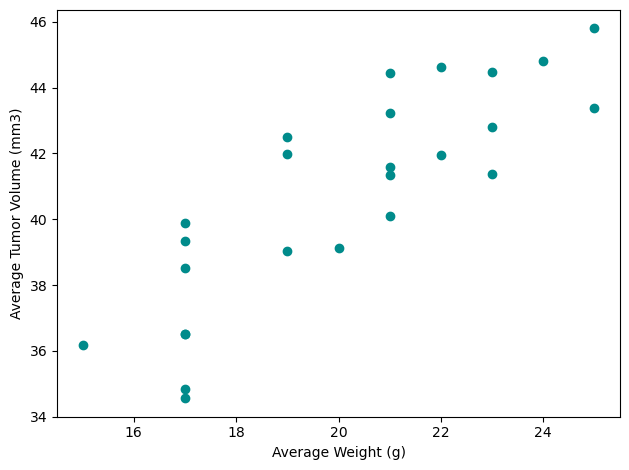

In [69]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
# Create two empyt lists to store averages
avg_volumes = []
avg_weights = []

# Create loop to calculate the averages
for mouse in mice_id:

    # First, create a filtered dataframe for each mouse
    mouse_avgs = capomulin_mice.loc[capomulin_mice['Mouse ID'] == mouse]

    # Calculate both of the averages and temporaroly store them in variables
    mouse_volume_avg = mouse_avgs['Tumor Volume (mm3)'].mean()
    mouse_weight_avg = mouse_avgs['Weight (g)'].mean()

    # Append values to lists for plotting
    avg_volumes.append(mouse_volume_avg)
    avg_weights.append(mouse_weight_avg)

# Generate a scatterplot using pyplot
plt.scatter(avg_weights, avg_volumes, marker='o', color='darkcyan', edgecolor='darkcyan')
plt.ylabel('Average Tumor Volume (mm3)')
plt.xlabel('Average Weight (g)')
plt.tight_layout()
plt.show()


## Correlation and Regression

In [70]:
# Convert list to a numpy array for calculations
x_axis = np.array(avg_weights)

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(avg_weights, avg_volumes)
regress_values = x_axis * slope + intercept


In [71]:
# Find the correlation coeficient
correlation = st.pearsonr(avg_weights, avg_volumes)


The correlation between mouse weight and average tumor volume is 0.84


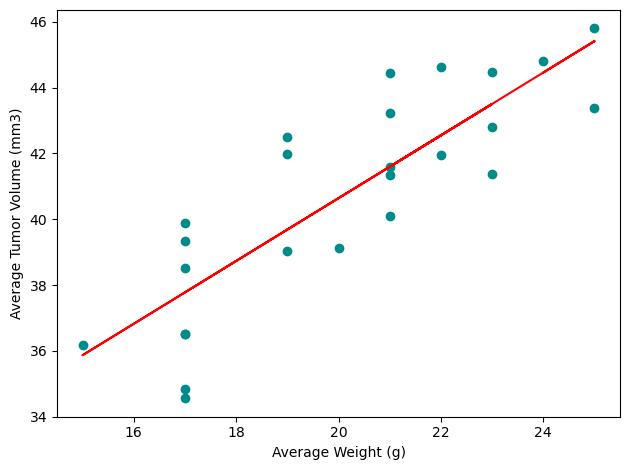

In [72]:
# Calculate the correlation coefficient and a linear regression model
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
print(f'The correlation between mouse weight and average tumor volume is {round(correlation.statistic,2)}')

# Display chart
plt.scatter(avg_weights, avg_volumes, marker='o', color='darkcyan', edgecolor='darkcyan')
plt.plot(avg_weights, regress_values,'r-')
plt.ylabel('Average Tumor Volume (mm3)')
plt.xlabel('Average Weight (g)')
plt.tight_layout()
plt.show()
